This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.


https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('hotel_bookings.csv')
df = df[df['hotel'] != 'City Hotel']

In [2]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40060 entries, 0 to 40059
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           40060 non-null  object 
 1   is_canceled                     40060 non-null  int64  
 2   lead_time                       40060 non-null  int64  
 3   arrival_date_year               40060 non-null  int64  
 4   arrival_date_month              40060 non-null  object 
 5   arrival_date_week_number        40060 non-null  int64  
 6   arrival_date_day_of_month       40060 non-null  int64  
 7   stays_in_weekend_nights         40060 non-null  int64  
 8   stays_in_week_nights            40060 non-null  int64  
 9   adults                          40060 non-null  int64  
 10  children                        40060 non-null  float64
 11  babies                          40060 non-null  int64  
 12  meal                            40060

# **PREPARACIÓN DE DATOS**

In [4]:
df.isnull() # Detectar valores nulos

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
40056,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
40057,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
40058,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [5]:
df.isnull().sum() # Contar valores nulos

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             464
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              8209
company                           36952


<Axes: >

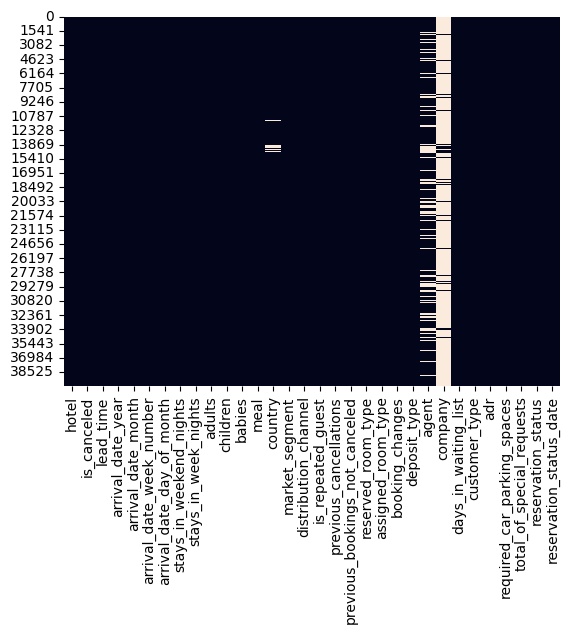

In [6]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False) # otra forma para visualizar mejor los valores nulos

In [7]:
df.head() # Ver el dataframe

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
df["is_canceled"].value_counts() # Ver cuanta gente ha cancelado la reserva

is_canceled
0    28938
1    11122
Name: count, dtype: int64

In [9]:
# Detectar que columnas son string para poder eliminarlas o convertirlas
columnas_string = df.select_dtypes(include=['object']).columns

valores_string = df[columnas_string].applymap(lambda x: isinstance(x, str))

print(valores_string)

       hotel  arrival_date_month  meal  country  market_segment  \
0       True                True  True     True            True   
1       True                True  True     True            True   
2       True                True  True     True            True   
3       True                True  True     True            True   
4       True                True  True     True            True   
...      ...                 ...   ...      ...             ...   
40055   True                True  True     True            True   
40056   True                True  True     True            True   
40057   True                True  True     True            True   
40058   True                True  True     True            True   
40059   True                True  True     True            True   

       distribution_channel  reserved_room_type  assigned_room_type  \
0                      True                True                True   
1                      True                True      

C:\Users\Adri\AppData\Local\Temp\ipykernel_2580\2977712316.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  valores_string = df[columnas_string].applymap(lambda x: isinstance(x, str))


In [10]:
# Eliminar columnas que no me sirven
df = df.drop(['agent', 'company', 'hotel', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'  ], axis = 1) # Elimino la columna hotel ya que no sirve

In [11]:
moda_children = df['children'].mode().iloc[0]

# Reemplazo los valores nulos con la moda
df['children'].fillna(moda_children, inplace=True)

In [12]:
# Voy a convertir los strings en floats los valores de la columna arrival_date_month
meses_a_numeros = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
df['arrival_date_month'] = df['arrival_date_month'].map(meses_a_numeros)
df['arrival_date_month'] = df['arrival_date_month'].astype(float)


In [13]:
df.arrival_date_month.value_counts()

arrival_date_month
8.0     4894
7.0     4573
4.0     3609
5.0     3559
10.0    3555
3.0     3336
9.0     3108
2.0     3103
6.0     3045
12.0    2648
11.0    2437
1.0     2193
Name: count, dtype: int64

In [14]:
df.meal.value_counts() # Ver los diferentes tipos de comida para poder convertirlos en floats.

meal
BB           30005
HB            8046
Undefined     1169
FB             754
SC              86
Name: count, dtype: int64

In [15]:
# Convertir los tipos de comida en floats.
tipos_de_comida = {
    'BB':1,
    'HB':2,
    'SC':3,
    'Undefined':4,
    'FB':5,
}
df['meal'] = df['meal'].map(tipos_de_comida)
df['meal'] = df['meal'].astype(float)


In [16]:
# Voy a contar de nuevo los valores nulos para comprobar que no haya más
df.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [17]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,7.0,27,1,0,0,2,0.0,0,1.0,0,0,0,3,0,0.0,0,0
1,0,737,2015,7.0,27,1,0,0,2,0.0,0,1.0,0,0,0,4,0,0.0,0,0
2,0,7,2015,7.0,27,1,0,1,1,0.0,0,1.0,0,0,0,0,0,75.0,0,0
3,0,13,2015,7.0,27,1,0,1,1,0.0,0,1.0,0,0,0,0,0,75.0,0,0
4,0,14,2015,7.0,27,1,0,2,2,0.0,0,1.0,0,0,0,0,0,98.0,0,1


# **REDUCCIÓN DIMENSIONALIDAD**

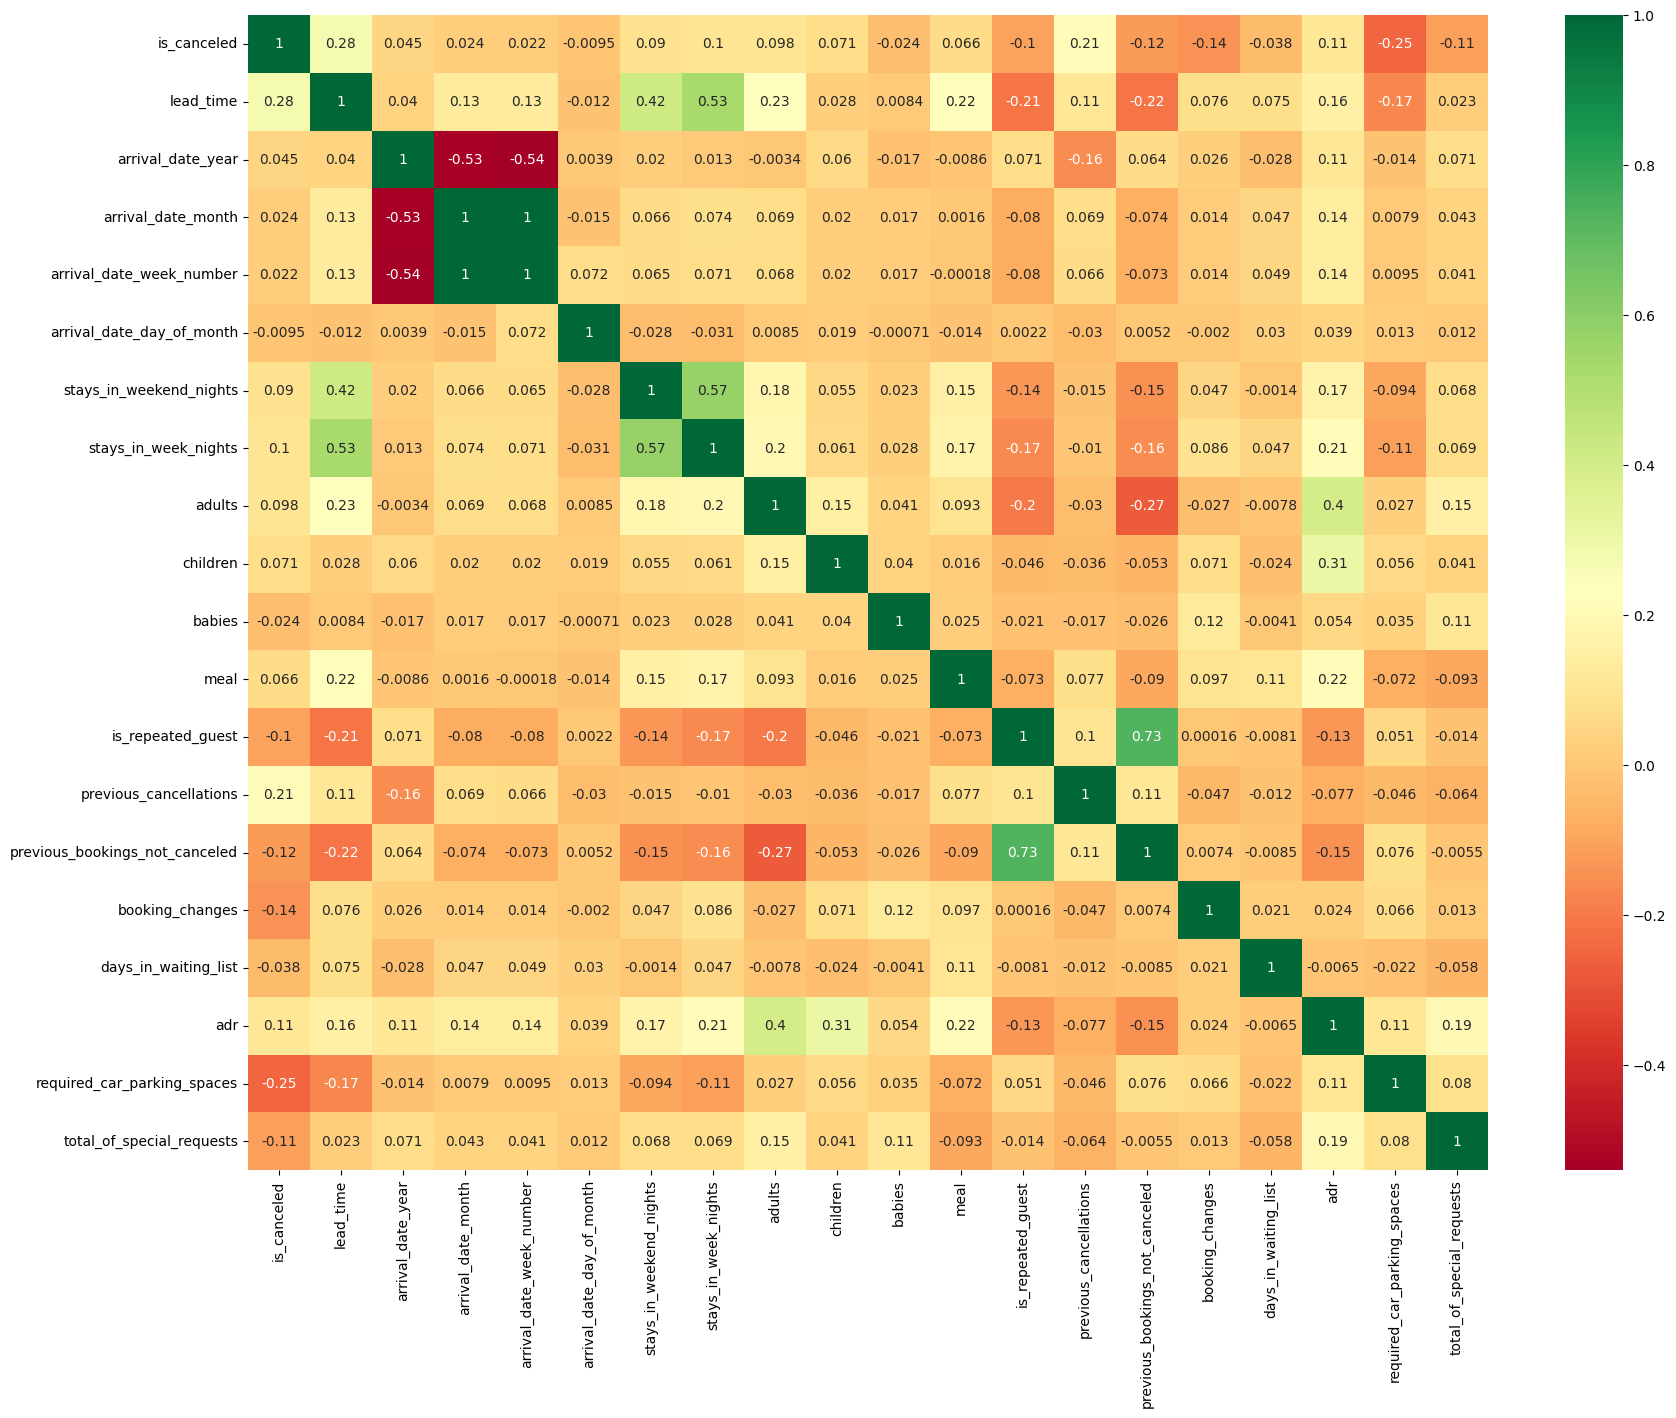

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
cor = df.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap="RdYlGn")
plt.show()

In [19]:
cor_target = abs(cor["is_canceled"])

## **Feature importance**

In [20]:
relevant_features = cor_target[cor_target>0.1]
relevant_features

is_canceled                       1.000000
lead_time                         0.277555
stays_in_week_nights              0.101527
is_repeated_guest                 0.103563
previous_cancellations            0.212020
previous_bookings_not_canceled    0.123160
booking_changes                   0.142100
adr                               0.109723
required_car_parking_spaces       0.247041
total_of_special_requests         0.109372
Name: is_canceled, dtype: float64

## **Correlation (Pearson)**

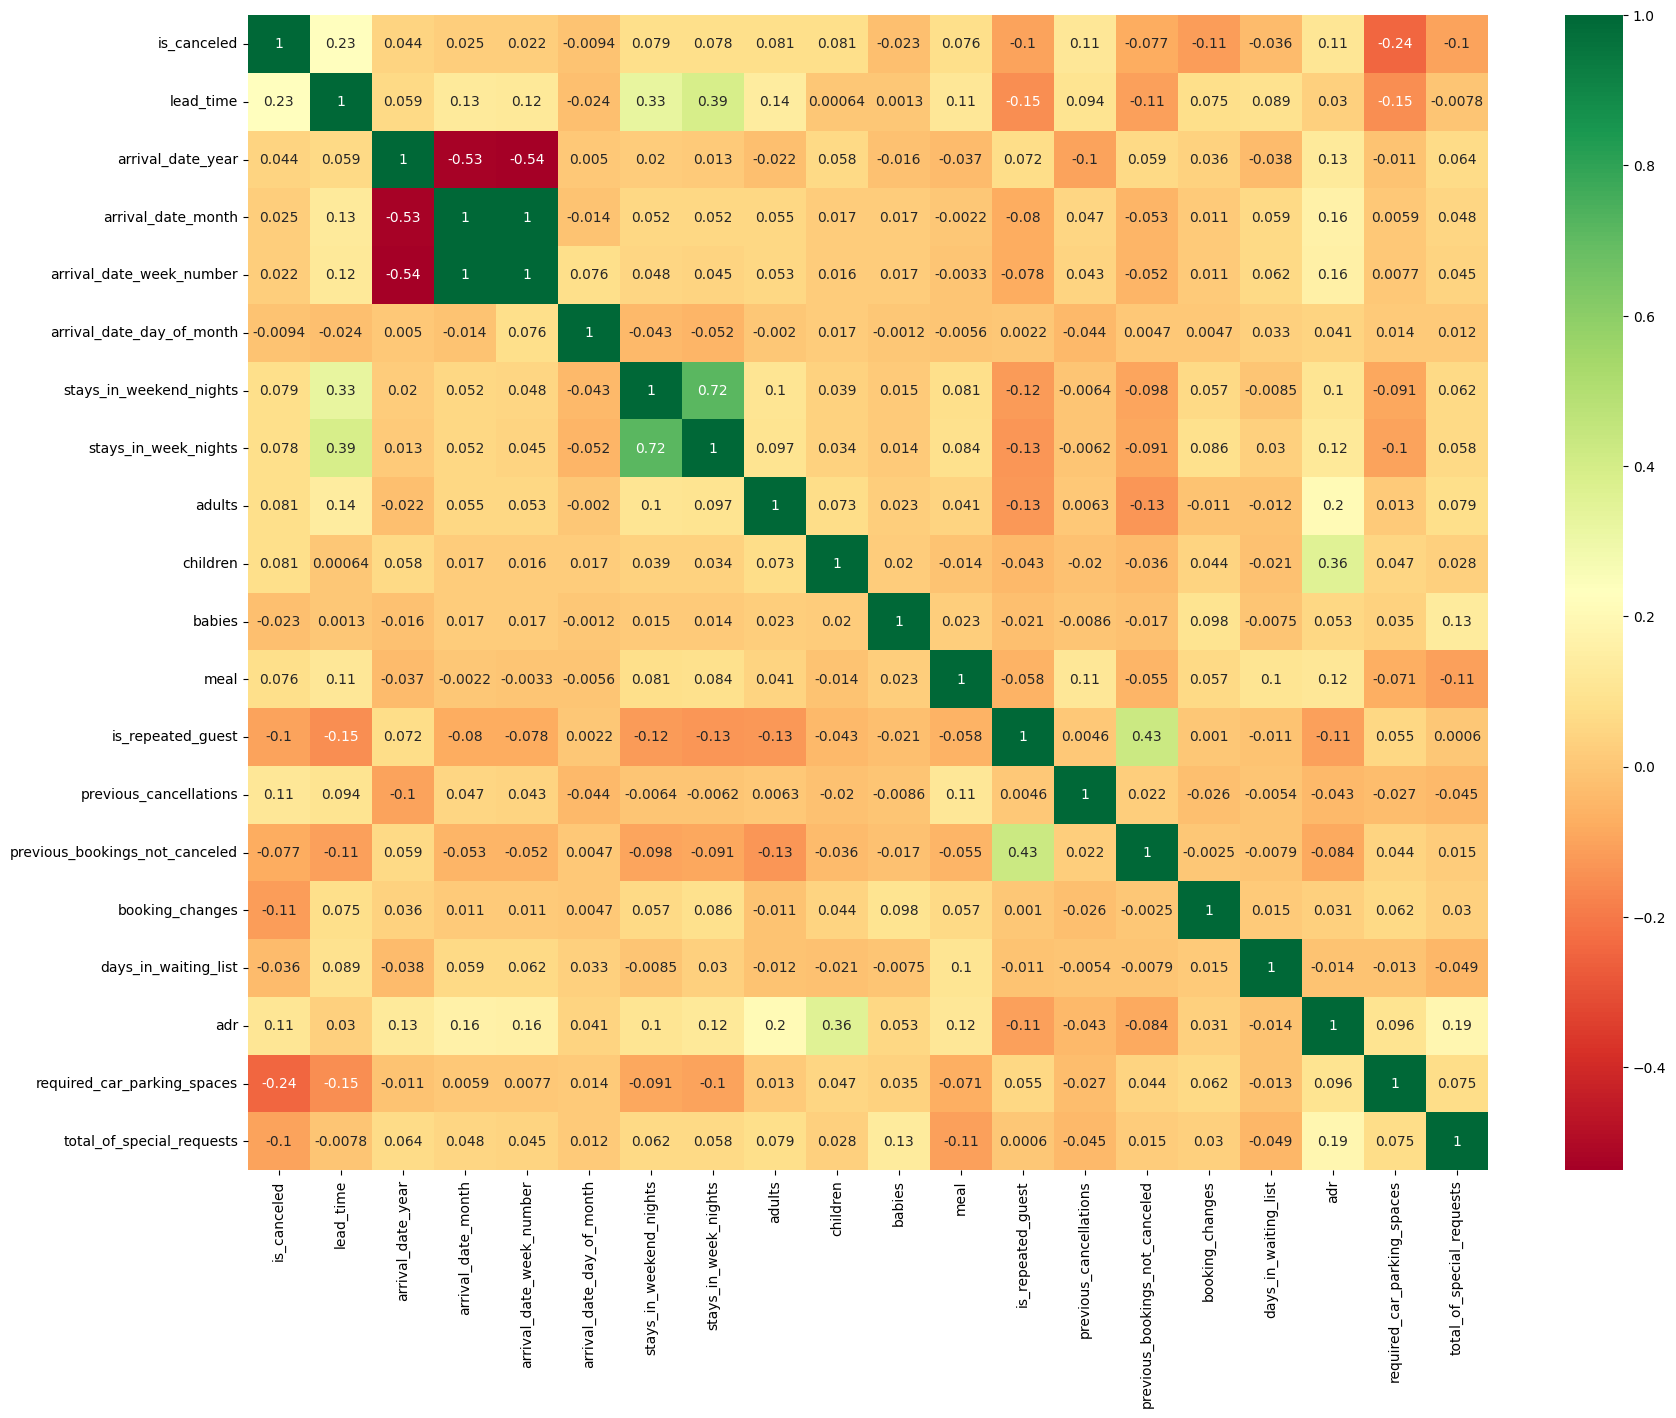

In [21]:
plt.figure(figsize=(20,15))
cor = df.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap="RdYlGn")
plt.show()

In [22]:
cor_target = abs(cor["is_canceled"])

relevant_features = cor_target[cor_target>0.1]
relevant_features

is_canceled                    1.000000
lead_time                      0.229444
is_repeated_guest              0.103563
previous_cancellations         0.114173
booking_changes                0.114835
adr                            0.109317
required_car_parking_spaces    0.243863
total_of_special_requests      0.101295
Name: is_canceled, dtype: float64

## **Backward elimination**

In [23]:
X = df.drop(["is_canceled"],  axis = 1)   
y = df["is_canceled"]

In [24]:
import statsmodels.api as sm

X = sm.add_constant(df.drop("is_canceled", axis=1))

model = sm.OLS(y, X).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:            is_canceled   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     397.2
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:46:01   Log-Likelihood:                -21202.
No. Observations:               40060   AIC:                         4.244e+04
Df Residuals:                   40040   BIC:                         4.262e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [25]:
def backward_elimination(X, y, nivel_significancia=0.05):
    num_vars = X.shape[1]
    for i in range(0, num_vars):
        modelo_OLS = sm.OLS(y, X).fit()
        max_p_valor = max(modelo_OLS.pvalues)
        if max_p_valor > nivel_significancia:
            # Encuentra la característica con el p-valor máximo y elimínala
            indice_max_p_valor = list(modelo_OLS.pvalues).index(max_p_valor)
            X = X.drop(X.columns[indice_max_p_valor], axis=1)
            print(f"Característica eliminada: {X.columns[indice_max_p_valor]} con p-valor: {max_p_valor}")
        else:
            break
    print(modelo_OLS.summary())
    return X

X = backward_elimination(X, y)



Característica eliminada: meal con p-valor: 0.816139528908135
Característica eliminada: stays_in_week_nights con p-valor: 0.07270459350809792
                            OLS Regression Results                            
Dep. Variable:            is_canceled   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     443.8
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:46:01   Log-Likelihood:                -21204.
No. Observations:               40060   AIC:                         4.244e+04
Df Residuals:                   40042   BIC:                         4.260e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t     

## **PCA**

In [26]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Escalar los datos
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# Aplicar PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

loadings = pd.DataFrame(pca.components_.T)
loadings.columns = ['PC1', 'PC2']
loadings

,PC1,PC2
0,0.000000,-5.551115e-17
1,0.168415,3.738859e-01
2,-0.408883,2.855539e-01
3,0.583892,-1.836573e-01
4,0.585021,-1.914473e-01
5,0.016777,-3.125043e-02
6,0.124451,3.930522e-01
7,0.117663,2.791521e-01
8,0.047236,2.141469e-01
9,0.064301,1.861232e-01


# **APRENDIZAJE SUPERVISADO**

La variable objetivo es is_canceled

## **REGRESIÓN**

In [29]:
# Estandarización
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [30]:
# Aplicar regresión logística
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_scaled, y, train_size=0.7)

In [31]:
modelo = LogisticRegression()
modelo.fit(X = X_train_logistic, y = y_train_logistic)

LogisticRegression()

In [32]:
y_pred_logistic = modelo.predict(X_test_logistic)

In [33]:
y_pred_logistic

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
y_pred_probabilidades = modelo.predict_proba(X = X_test_logistic)
y_pred_probabilidades = pd.DataFrame(y_pred_probabilidades, columns = modelo.classes_)
y_pred_probabilidades.head(5)

,0,1
0,0.682084,0.317916
1,0.657005,0.342995
2,0.732913,0.267087
3,0.999825,0.000175
4,0.912578,0.087422


In [35]:
print("Intercept:", modelo.intercept_)
print("Coeficientes:", list(zip(X.columns, modelo.coef_.flatten(), )))

print("Accuracy:", modelo.score(X_test_logistic, y_test_logistic))

Intercept: [-1.71465052]
Coeficientes: [('const', 0.0), ('lead_time', 0.37548233949214793), ('arrival_date_year', 0.15418782915721974), ('arrival_date_month', 0.9979616023323896), ('arrival_date_week_number', -0.9865841299207796), ('arrival_date_day_of_month', 0.10277212343120949), ('stays_in_week_nights', -0.052537129898898284), ('adults', 0.09809083887964434), ('children', 0.13265836428745936), ('meal', 0.006270117019180108), ('is_repeated_guest', -0.3224952804081805), ('previous_cancellations', 4.861697417343411), ('previous_bookings_not_canceled', -0.6455735050126843), ('booking_changes', -0.4154331379705564), ('days_in_waiting_list', -0.20015129472012494), ('adr', 0.29994448485157515), ('required_car_parking_spaces', -2.631956266043588), ('total_of_special_requests', -0.27594244002757506)]
Accuracy: 0.7691795639873523


## **SVM**

In [36]:
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_scaled, y, train_size=0.7)

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

modelo = SVC(kernel='linear')
modelo.fit(X_train_SVM,y_train_SVM)
y_pred_SVM = modelo.predict(X_test_SVM)
print(accuracy_score(y_test_SVM, y_pred_SVM))

0.7445498419038109


## **DECISION TREES**

In [38]:
y = df['is_canceled']
X = df.drop(['is_canceled'], axis = 1)

X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_scaled, y, train_size=0.7)

In [39]:
from sklearn import tree

modelo = tree.DecisionTreeClassifier(random_state=0)
modelo.fit(X_train_DT, y_train_DT)

DecisionTreeClassifier(random_state=0)

In [40]:
y_pred_DT = modelo.predict(X_test_DT)

In [41]:
print("Accuracy:", modelo.score(X_test_DT, y_test_DT))

Accuracy: 0.8042103511399568


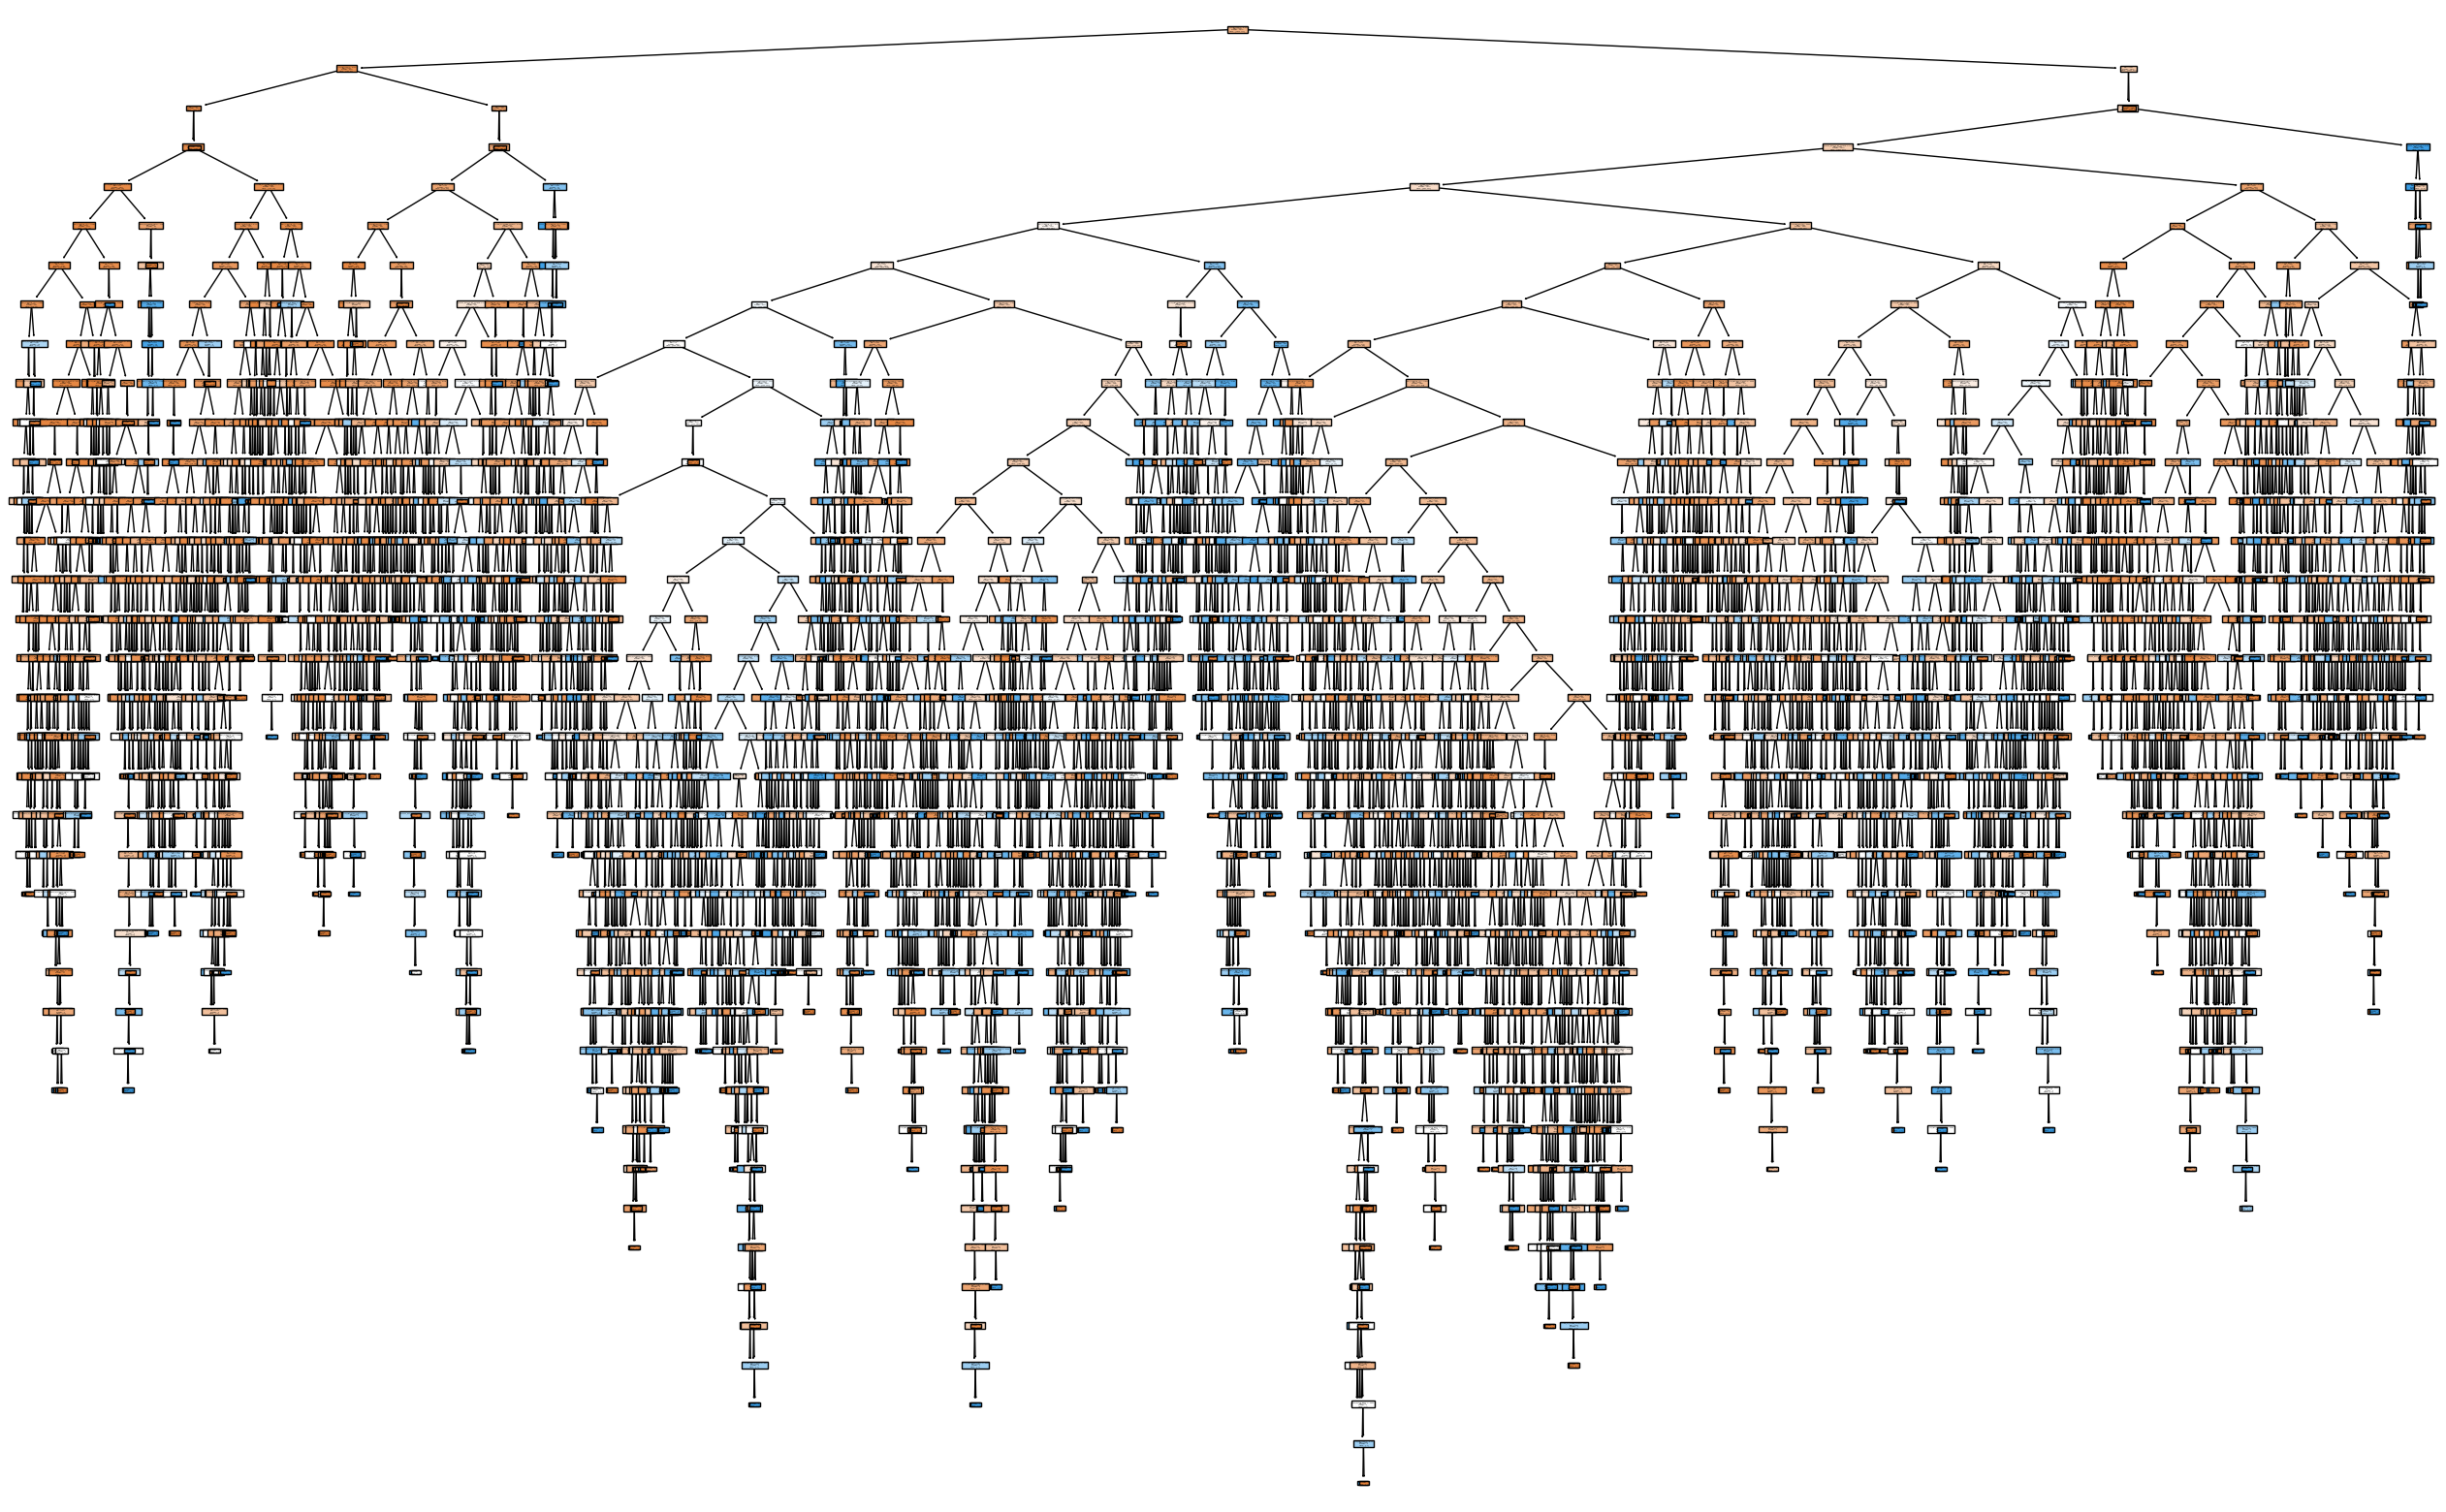

In [42]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize = (32, 20))
plot_tree(modelo, filled = True, feature_names = X.columns)
plt.show()

# **MÉTRICAS**

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df.drop(['is_canceled'], axis = 1)
y = df['is_canceled']

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Los valores de la variable objetivo no están balanceados
modelo = LogisticRegression(class_weight='balanced')
modelo.fit(X = X_train, y = y_train)

predicciones = modelo.predict(X = X_test)
predicciones

C:\Users\Adri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, predicciones))
print("Precisión:", precision_score(y_test, predicciones))

Accuracy: 0.6745714761191546
Precisión: 0.4443118536197295


In [45]:
cm = confusion_matrix(y_test,predicciones)

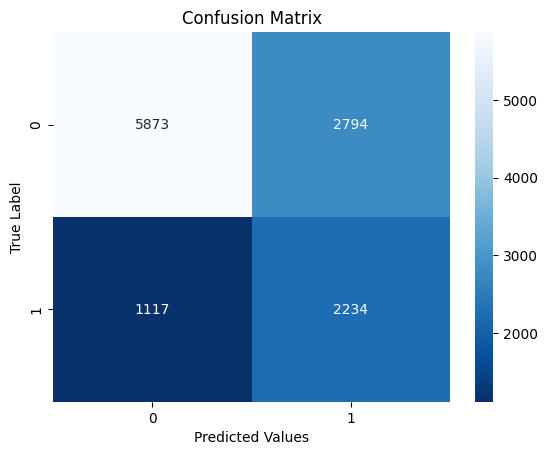

In [46]:
import matplotlib.pyplot as plt
from sklearn import metrics

sns.heatmap(cm, annot=True, cmap='Blues_r', fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('True Label')
plt.show()